<a href="https://colab.research.google.com/github/nv-hiep/customer_clustering/blob/main/Customer_Segmentation_DataAnalysis_R_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation with Kmeans using R

Here I use Customers.csv data

https://colab.research.google.com/notebook#create=true&language=r

# 1. Packages

In [ ]:
install.packages("psych")

In [ ]:
install.packages("viridis")

# 2. Load libraries

In [ ]:
library(tidyverse)

In [ ]:
library(stringr)
library(lubridate)

In [ ]:
library(viridis)

In [ ]:
library(psych)

In [ ]:
library(devtools)
install_github("vqv/ggbiplot")

In [ ]:
library(ggbiplot)

# 3. Connect to Google Drive

In [6]:
getwd()

[1] "/content"

In [7]:
system("ls", TRUE)

[1] "sample_data"

In [8]:
system("pwd", TRUE)

[1] "/content"

# 4. Data Directories

In [9]:
BASE_PATH <- '/content/'
DATA_PATH <- paste0(BASE_PATH, 'sample_data/')
DATA_PATH

[1] "/content/sample_data/"

In [10]:
list.dirs()

[1] "."                         "./.config"                
[3] "./.config/configurations"  "./.config/logs"           
[5] "./.config/logs/2021.08.25" "./sample_data"

In [11]:
setwd(DATA_PATH)
getwd()

[1] "/content/sample_data"

In [12]:
system("ls", TRUE)

[1] "anscombe.json"                "california_housing_test.csv" 
[3] "california_housing_train.csv" "Customers.csv"               
[5] "mnist_test.csv"               "mnist_train_small.csv"       
[7] "README.md"

# 5. Read data

In [13]:
# Read in the dataset as a tibble
data_file <- paste0(DATA_PATH, 'Customers.csv')
tb        <- read.csv(data_file)
glimpse(tb)

Rows: 200
Columns: 5
$ CustomerID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Genre          <chr> "Male", "Male", "Female", "Female", "Female", "Female",…
$ Age            <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24,…
$ Annual.Income  <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20,…
$ Spending.Score <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13…


In [14]:
tb$Genre <- as.factor(tb$Genre)

In [15]:
head(tb, 2)

,CustomerID,Genre,Age,Annual.Income,Spending.Score
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81


In [16]:
summary(tb)

   CustomerID        Genre          Age        Annual.Income    Spending.Score 
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00   Min.   : 1.00  
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50   1st Qu.:34.75  
 Median :100.50                Median :36.00   Median : 61.50   Median :50.00  
 Mean   :100.50                Mean   :38.85   Mean   : 60.56   Mean   :50.20  
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00   3rd Qu.:73.00  
 Max.   :200.00                Max.   :70.00   Max.   :137.00   Max.   :99.00  

In [17]:
cat('Number of columns:', length(colnames(tb)), '\n' )
print( paste('Number of columns:', length(colnames(tb))) )
colnames(tb)

Number of columns: 5 
[1] "Number of columns: 5"


[1] "CustomerID"     "Genre"          "Age"            "Annual.Income" 
[5] "Spending.Score"

In [18]:
cat('Number of (row and columns):', dim(tb) )

Number of (row and columns): 200 5

In [19]:
# Number of columns and rows
NROW(tb)
NCOL(tb)

[1] 200

[1] 5

In [20]:
# Check Null/NaN values
sum(is.na(tb))

[1] 0

In [21]:
# Remove any missing value that might be present in the data
tb <- na.omit(tb)

# 6. Data Cleaning / Data Wrangling

## Check CustomerID

In [22]:
unique(tb$CustomerID)

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200

In [23]:
# Check Null/NaN values
sum(is.na(tb$CustomerID))

[1] 0

## Check Genre

In [24]:
unique(tb$Genre)

[1] Male   Female
Levels: Female Male

In [25]:
# Check Null/NaN values
sum(is.na(tb$Genre))

[1] 0

## Check Age

In [26]:
summary(tb$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [27]:
unique(tb$Age)

[1] 19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49 42
[26] 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44 28 56
[51] 41

In [28]:
# Check Null/NaN values
sum(is.na(tb$Age))

[1] 0

## Check Annual.Income

In [29]:
summary(tb$Annual.Income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

In [30]:
unique(tb$Annual.Income)

[1]  15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39  40
[20]  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64  65  67
[39]  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88  93  97  98
[58]  99 101 103 113 120 126 137

In [31]:
# Check Null/NaN values
sum(is.na(tb$Annual.Income))

[1] 0

## Check Spending.Score

In [32]:
summary(tb$Spending.Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

In [33]:
unique(tb$Spending.Score)

[1] 39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31 87
[26]  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49 53 44
[51] 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1 78 83 27
[76] 63 86 69 24 68 85 23  8 18

In [34]:
# Check Null/NaN values
sum(is.na(tb$Spending.Score))

[1] 0

In [35]:
head(tb,4)

,CustomerID,Genre,Age,Annual.Income,Spending.Score
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77


# 8. Exploratory Data Analysis

## Age

In [36]:
summary(tb$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

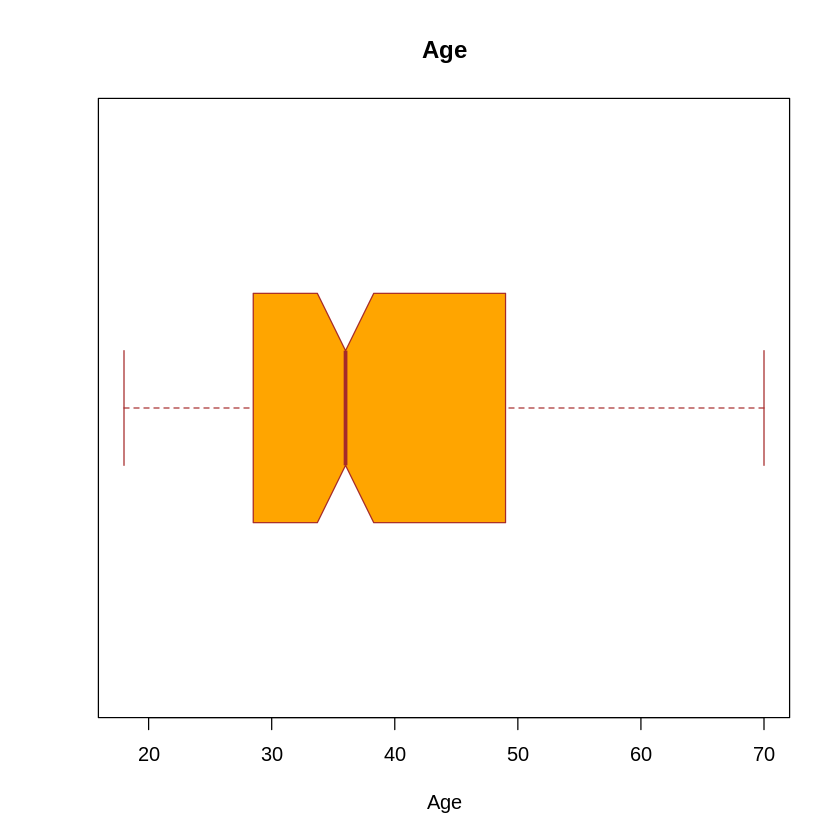

In [37]:
# box plot
boxplot(tb$Age,
main = "Age",
xlab = "Age",
ylab = "",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

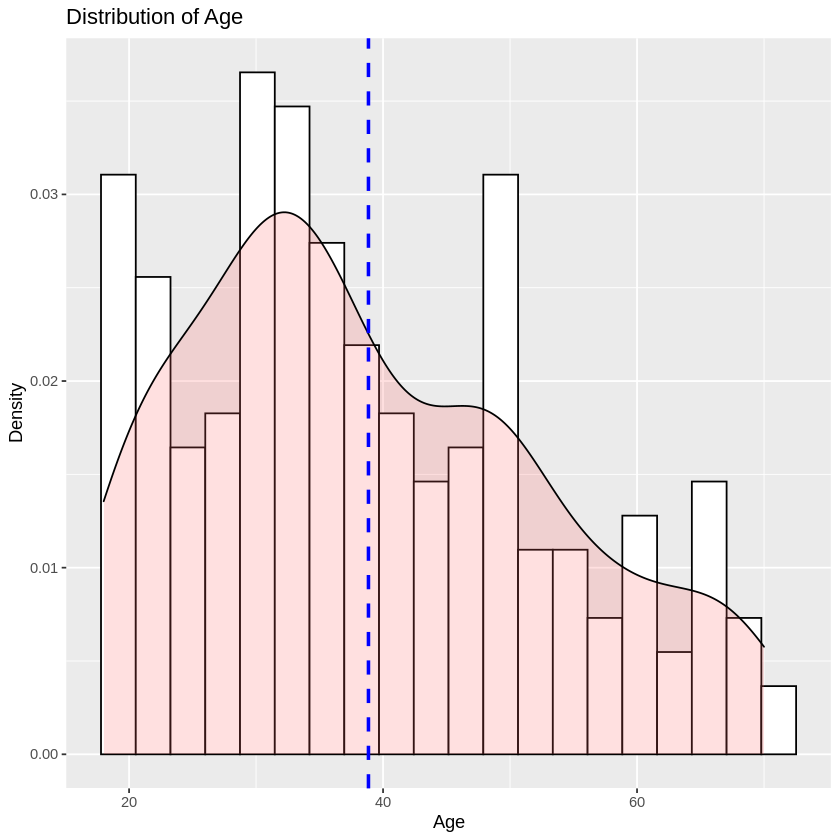

In [38]:
# Basic density
ggplot(tb, aes(x=Age)) + 
 geom_histogram(aes(y=..density..), bins=20, colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") +
 geom_vline(aes(xintercept=mean(Age)), color="blue", linetype="dashed", size=1)+
 ggtitle("Distribution of Age")+
  xlab("Age") +
  ylab("Density")

Customer's age spreads from 18 to 70. The age distribution peaks at ~30.

## Annual Income

In [39]:
summary(tb$Annual.Income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

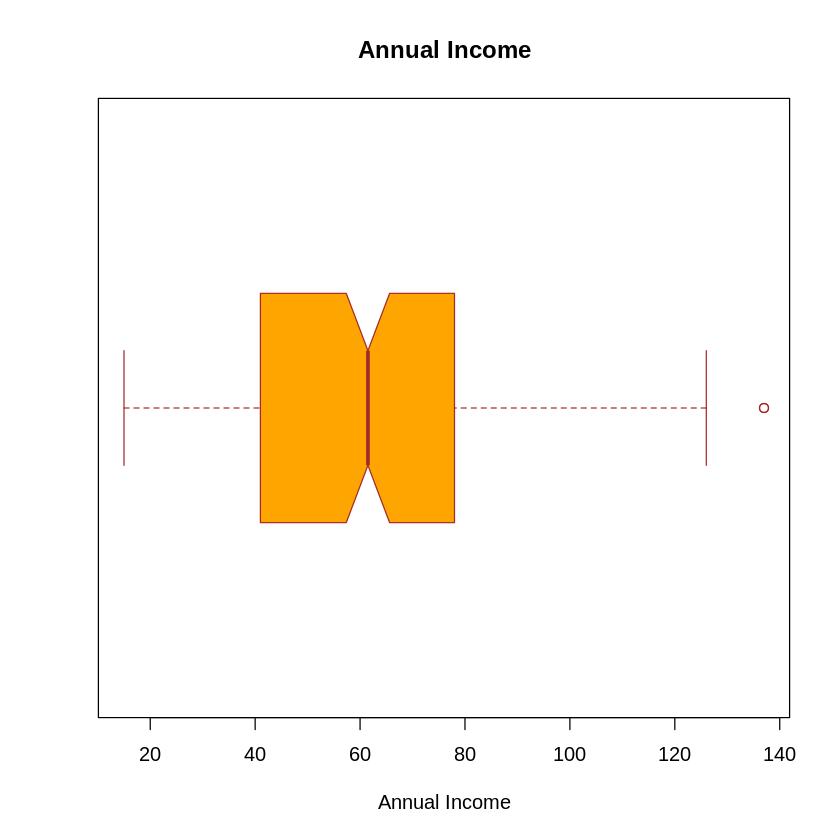

In [40]:
# box plot
boxplot(tb$Annual.Income,
main = "Annual Income",
xlab = "Annual Income",
ylab = "",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

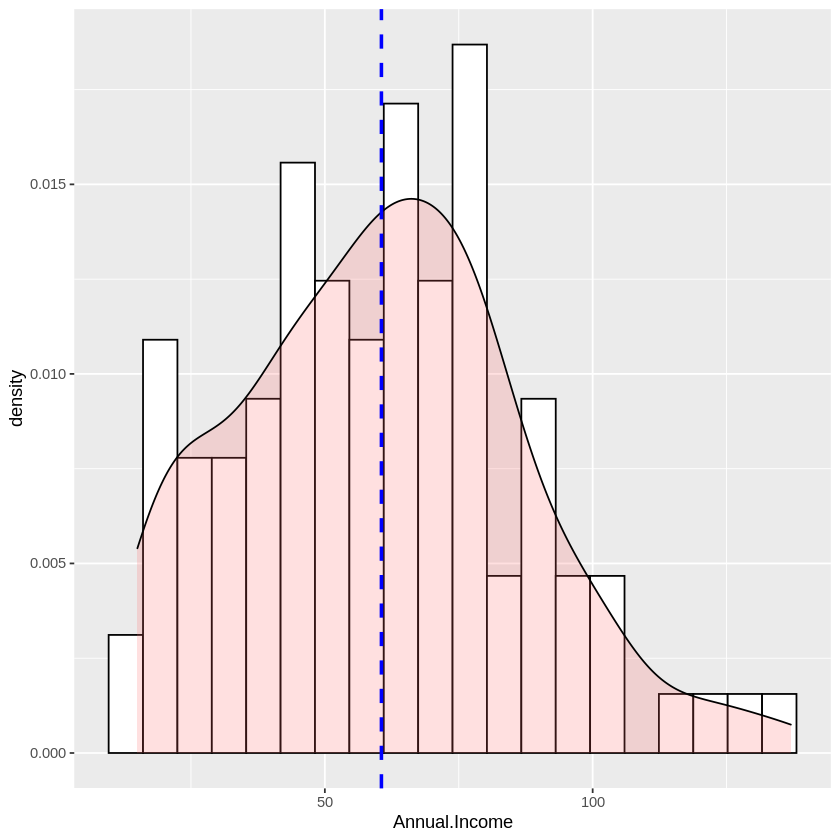

In [41]:
# Basic density
ggplot(tb, aes(x=Annual.Income)) + 
 geom_histogram(aes(y=..density..), bins=20, colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") +
 geom_vline(aes(xintercept=mean(Annual.Income)), color="blue", linetype="dashed", size=1)

THe income ranges from 15k to 137k, with a mean of 60.5k and median at 61.5k. Most customers' income falls in the range of 60-70k. Less customers are found at higher end.

## Spending Score

In [42]:
summary(tb$Spending.Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

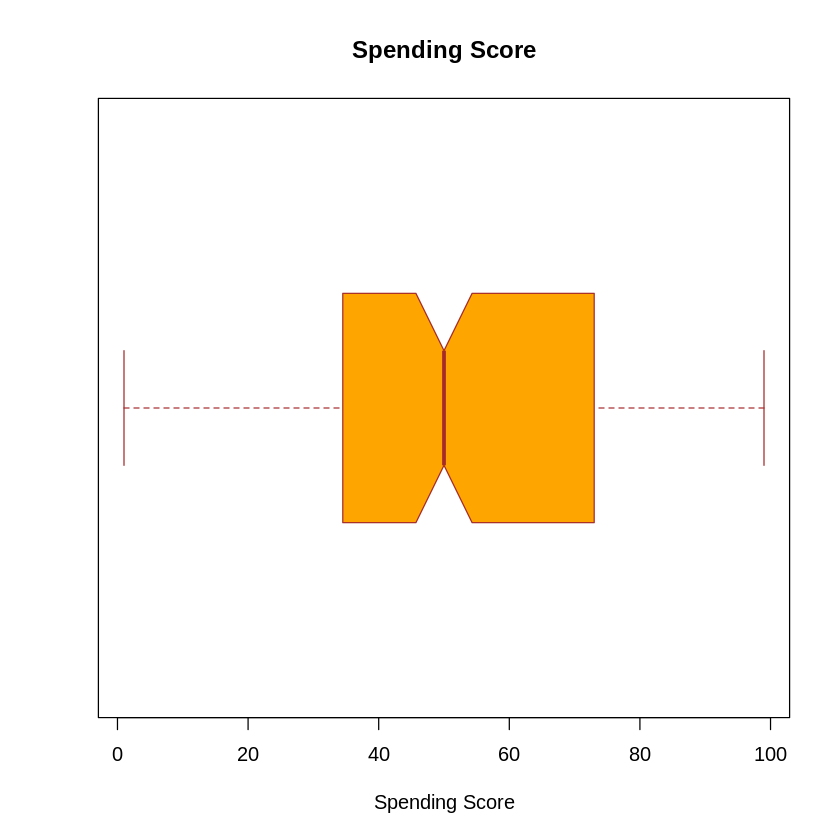

In [43]:
# box plot
boxplot(tb$Spending.Score,
main = "Spending Score",
xlab = "Spending Score",
ylab = "",
col = "orange",
border = "brown",
horizontal = TRUE,
notch = TRUE
)

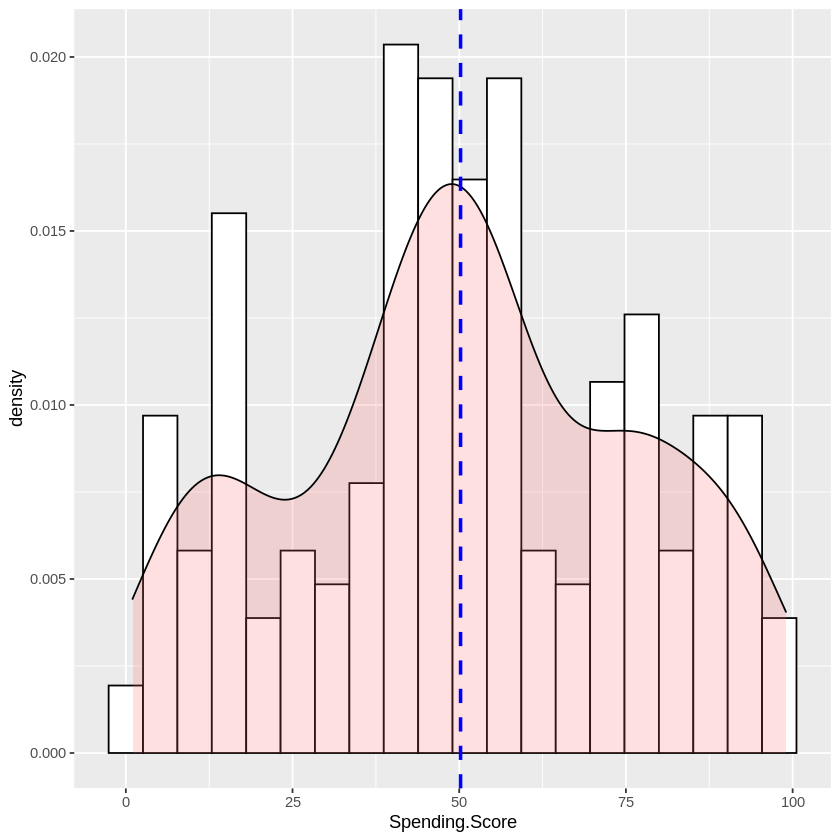

In [44]:
# Basic density
ggplot(tb, aes(x=Spending.Score)) + 
 geom_histogram(aes(y=..density..), bins=20, colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") +
 geom_vline(aes(xintercept=mean(Spending.Score)), color="blue", linetype="dashed", size=1)

The Spending Score are presented in \% (0-100), with a mean of 50.2k and median at 50k, meaning that its distribution is relatively symetric. The score peaks at ~50, and declines toward the two ends.

## Genre

In [45]:
summary(tb$Genre)

Female   Male 
   112     88

In [46]:
genre_tb <- tb %>% 
   group_by(Genre) %>%
   tally() %>%
   mutate(perc = round(100.* n / sum(n), 1) ) %>%
   arrange(desc(n))

genre_tb

Genre,n,perc
<fct>,<int>,<dbl>
Female,112,56
Male,88,44


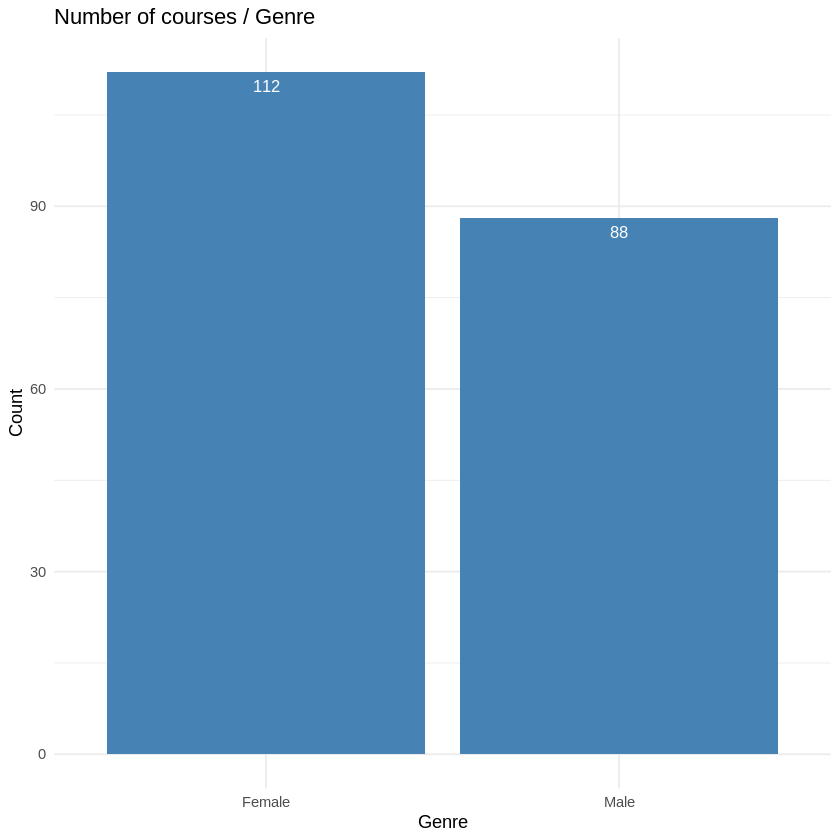

In [47]:
ggplot(data=genre_tb, aes(x=reorder(Genre, -n), y=n)) +
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=n), vjust=1.6, color="white", size=3.5)+
  theme_minimal() +
  ggtitle("Number of courses / Genre") +
  xlab("Genre") +
  ylab("Count")

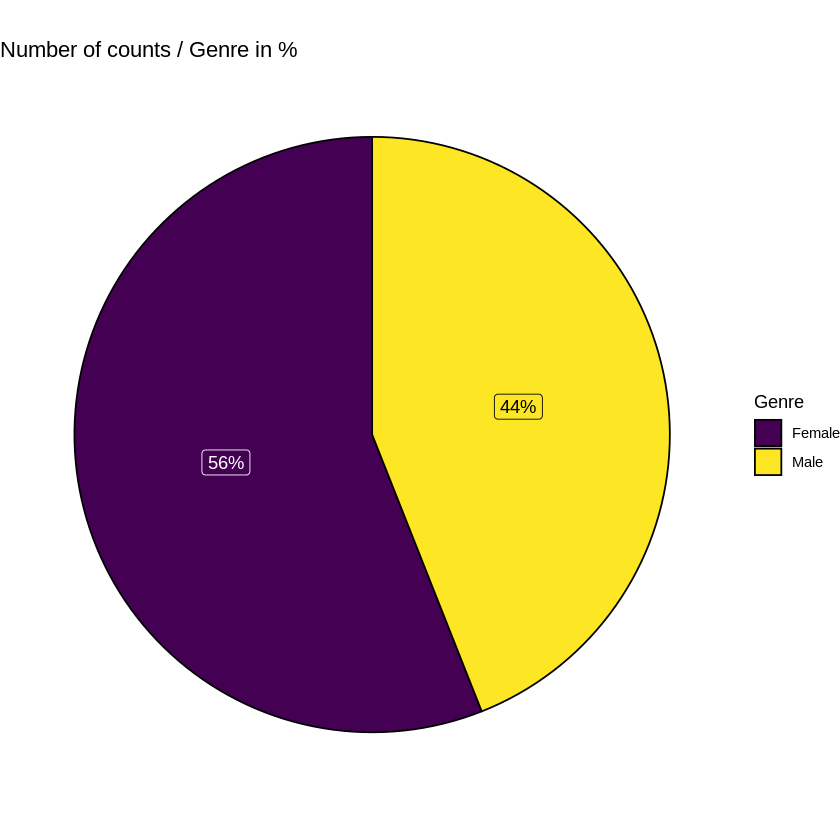

In [48]:
plabel = paste0(as.character(round(genre_tb$perc, 1)), "%")

ggplot(data = genre_tb, aes(x = "", y = perc, fill = Genre)) +
  geom_col(color = "black") +
  ggtitle("Number of counts / Genre in %") +
  geom_label(aes(label = plabel), color = c("white", "black"),
            position = position_stack(vjust = 0.5),
            show.legend = FALSE) +
  guides(fill = guide_legend(title = "Genre")) +
  scale_fill_viridis_d() +
  coord_polar(theta = "y") + 
  theme_void()

More female customers represent in the dataset (56% compared to 44% of the male).

## Age and Genre

In [49]:
# Annual.Income of the Genre
agegenre_tb <- tb %>%
	group_by(Genre) %>%
	summarise(mean = mean(Age)) %>%
  # mutate(perc = round(100.* total / sum(total), 1) ) %>%
	arrange(desc(mean))
agegenre_tb

Genre,mean
<fct>,<dbl>
Male,39.80682
Female,38.09821


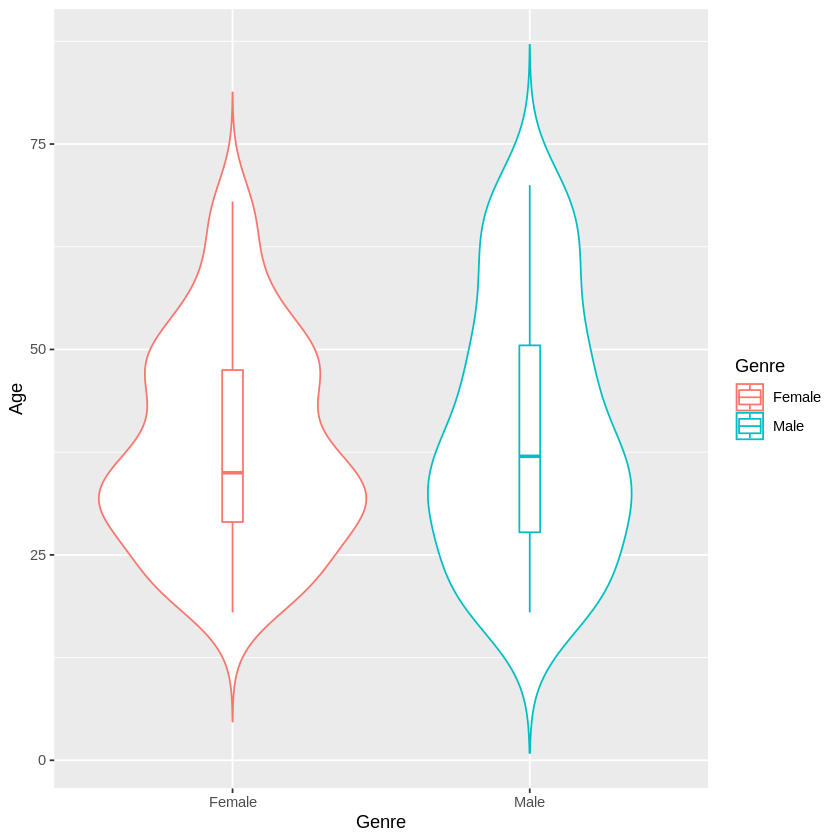

In [50]:
ggplot(tb, aes(x = Genre, y = Age, color = Genre)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.07)

The mean age of female and male customers is close, only with a 2 year difference.

## Annual.Income and Genre

In [51]:
# Annual.Income of the Genre
income_genre_tb <- tb %>%
	group_by(Genre) %>%
	summarise(mean = mean(Annual.Income)) %>%
  # mutate(perc = round(100.* total / sum(total), 1) ) %>%
	arrange(desc(mean))

income_genre_tb

Genre,mean
<fct>,<dbl>
Male,62.22727
Female,59.25000


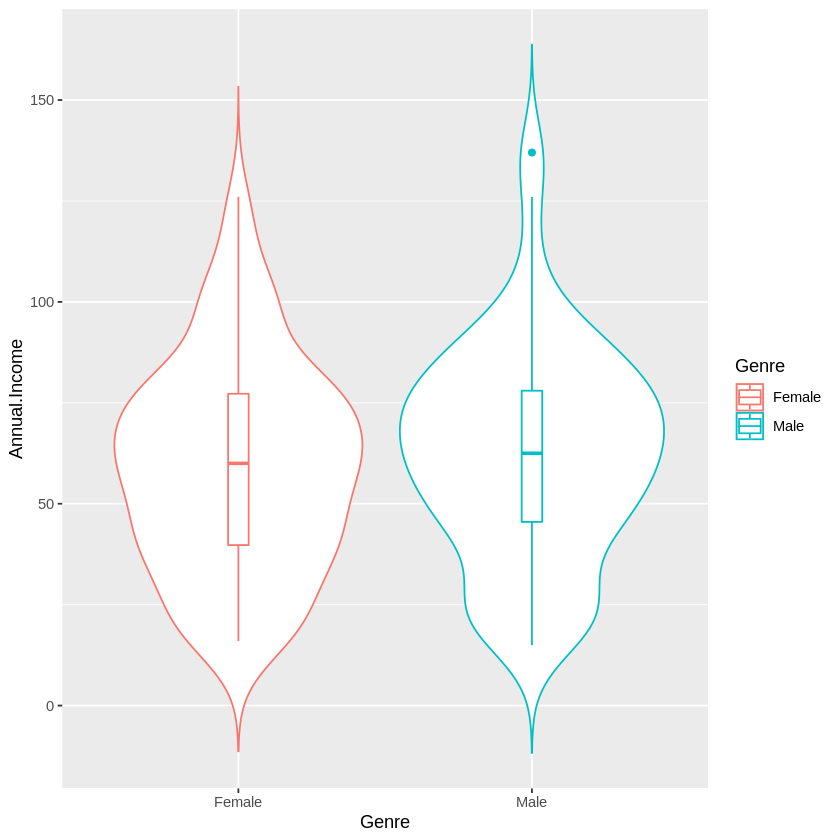

In [52]:
ggplot(tb, aes(x = Genre, y = Annual.Income, color = Genre)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.07)

The mean Annual Income of male customers is slightly higher than that of its counterpart, ~3k.

## Spending.Score and Genre

In [53]:
# Spending.Score of the Genre
spending_genre_tb <- tb %>%
	group_by(Genre) %>%
	summarise(mean = mean(Spending.Score)) %>%
  # mutate(perc = round(100.* total / sum(total), 1) ) %>%
	arrange(desc(mean))

spending_genre_tb

Genre,mean
<fct>,<dbl>
Female,51.52679
Male,48.51136


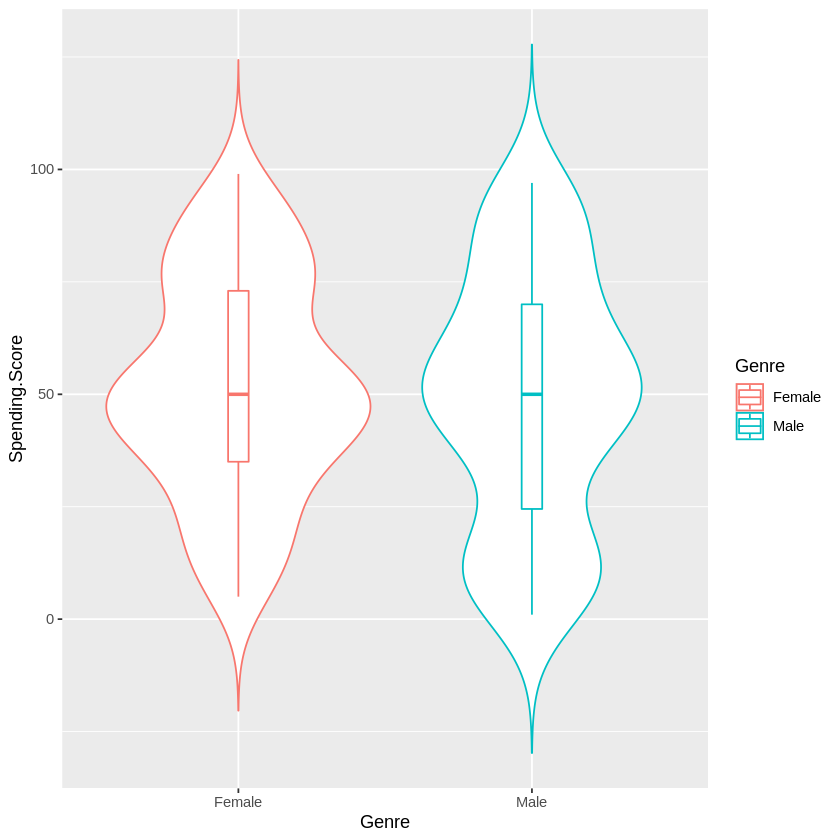

In [54]:
ggplot(tb, aes(x = Genre, y = Spending.Score, color = Genre)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.07)

Female customers tend to spend slightly more than male customers, with mean Spending Scores of 51.5 and 48.5 respectively.

## Spending Score vs Annual Income

In [55]:
# The k-Means algorithm is not applicable to categorical data,
# as categorical variables are discrete and do not have any natural origin.
# So computing euclidean distance for such as space is not meaningful.

df <- tb %>%
         select(Annual.Income, Spending.Score) %>% as_tibble()
head(df,4)

Annual.Income,Spending.Score
<int>,<int>
15,39
15,81
16,6
16,77


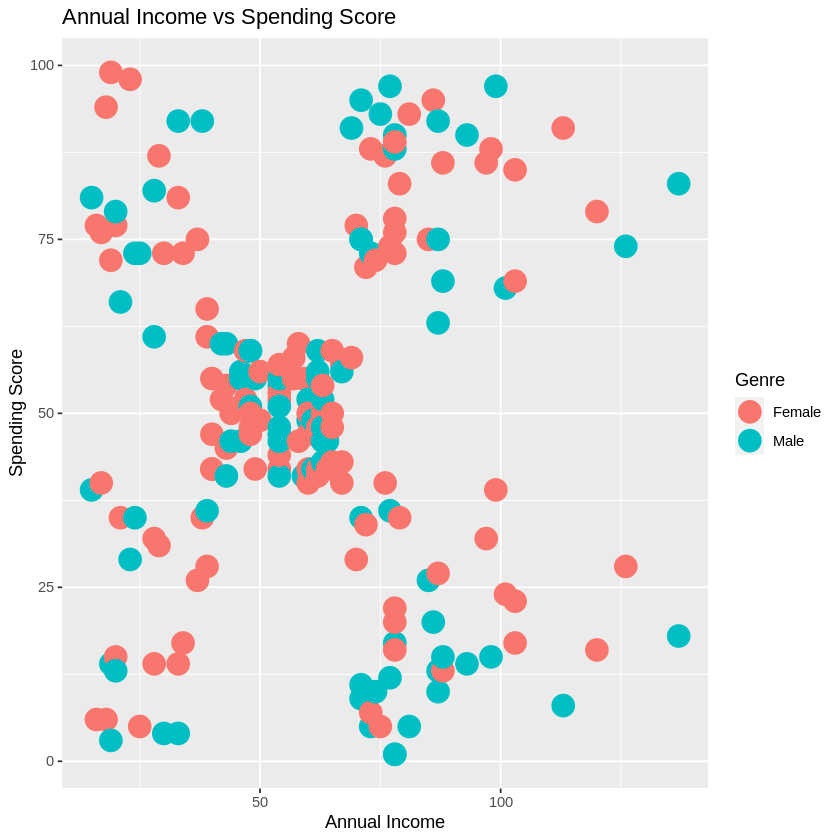

In [56]:
# A basic scatterplot with color
ggplot(df, aes(x=Annual.Income, y=Spending.Score, color = tb$Genre)) +
     geom_point(size=6)+
      ggtitle("Annual Income vs Spending Score")+
      ylab("Spending Score") +
      xlab("Annual Income")+
      guides(color = guide_legend(title = "Genre"))

No clear trend in the relation of Spending_Score vs Annual_Income. However, the relation appears to group into 05 clusters. Customers with Low Annual Income (AI < 50k) and high Annual Income (AI > 70k) both appear to separate to 2 subgroups (low spending and high spending). Whereas, customers with moderate income tend to spend moderately.

## Annual Income vs Age

In [57]:
df <- tb %>%
         select(Age, Annual.Income, Genre) %>% as_tibble()
head(df,4)

Age,Annual.Income,Genre
<int>,<int>,<fct>
19,15,Male
21,15,Male
20,16,Female
23,16,Female


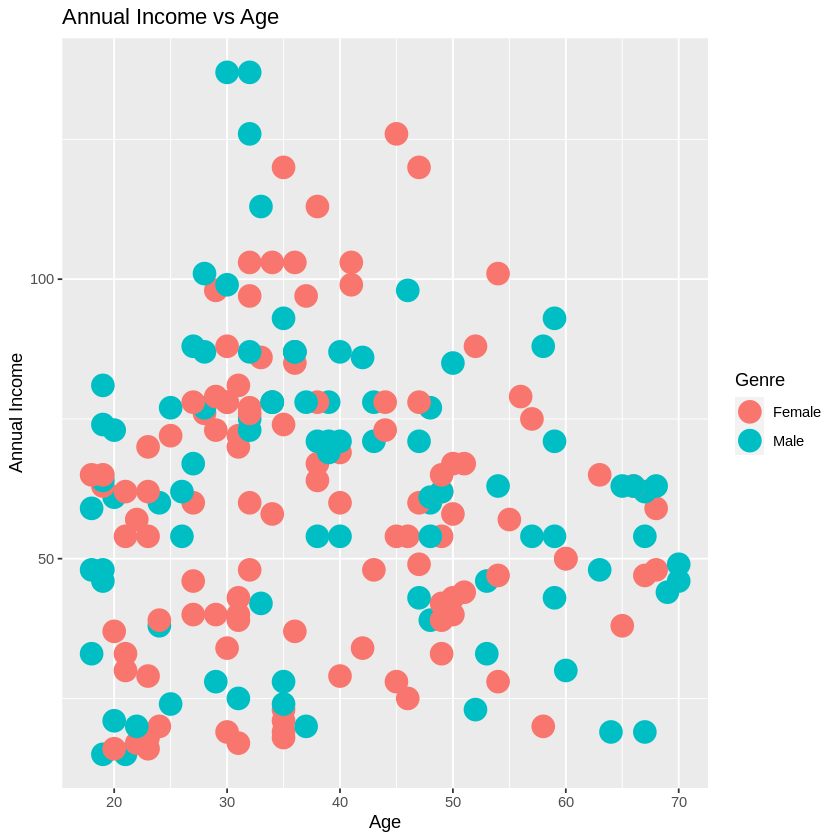

In [58]:
# A basic scatterplot with color
ggplot(df, aes(x=Age, y=Annual.Income, color = Genre)) +
     geom_point(size=6)+
      ggtitle("Annual Income vs Age")+
      ylab("Annual Income") +
      xlab("Age")+
      guides(color = guide_legend(title = "Genre"))

Customers of age (30-40) seems to gain higher annual income.

Younger customers (age < 35) seems to spend more.

In [59]:
glimpse(tb)

Rows: 200
Columns: 5
$ CustomerID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Genre          <fct> Male, Male, Female, Female, Female, Female, Female, Fem…
$ Age            <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24,…
$ Annual.Income  <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20,…
$ Spending.Score <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13…


## Spending Score vs Age

In [60]:
df <- tb %>%
         select(Age, Spending.Score, Genre) %>% as_tibble()
head(df,4)

Age,Spending.Score,Genre
<int>,<int>,<fct>
19,39,Male
21,81,Male
20,6,Female
23,77,Female


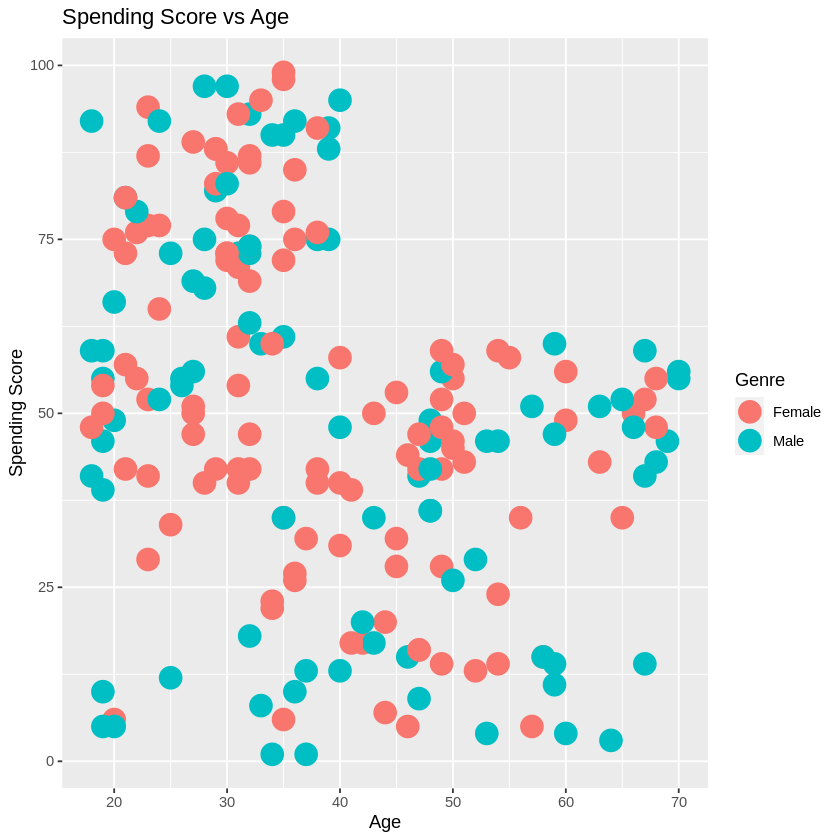

In [61]:
# A basic scatterplot with color
ggplot(df, aes(x=Age, y=Spending.Score, color = Genre)) +
     geom_point(size=6)+
      ggtitle("Spending Score vs Age")+
      ylab("Spending Score") +
      xlab("Age")+
      guides(color = guide_legend(title = "Genre"))

Younger customers (age < 35) seems to spend more compared to the elders.

# Principal component analysis (PCA) in R

In [66]:
glimpse(tb)

Rows: 200
Columns: 5
$ CustomerID     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ Genre          <fct> Male, Male, Female, Female, Female, Female, Female, Fem…
$ Age            <int> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24,…
$ Annual.Income  <int> 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20,…
$ Spending.Score <int> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13…


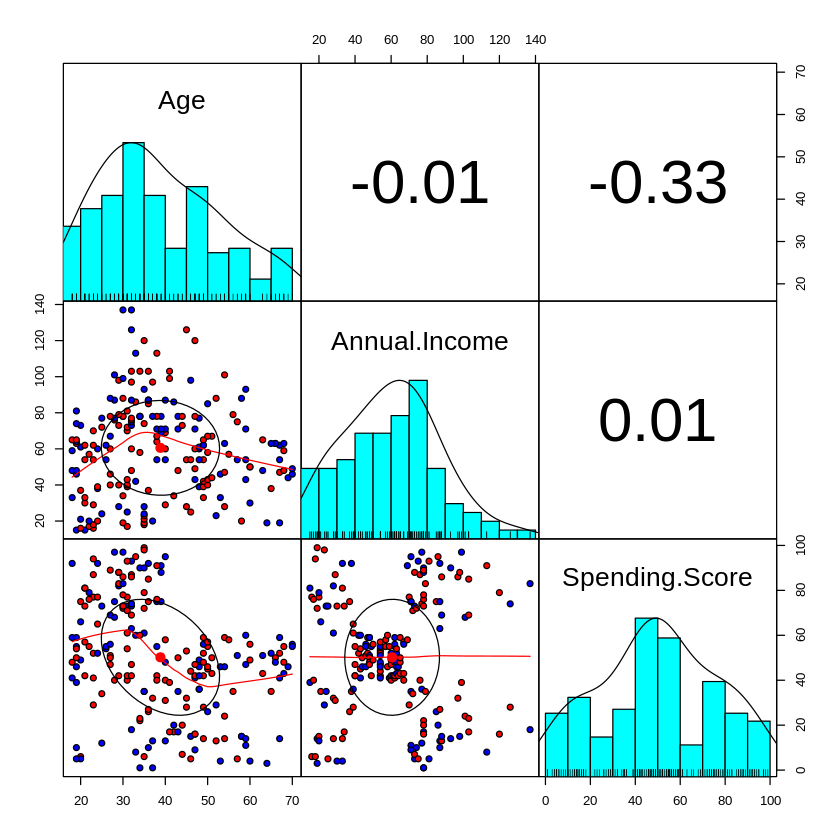

In [69]:
pairs.panels(tb[,-c(1,2)],
             gap = 0,
             bg = c("red", "blue")[tb$Genre],
             pch=21)

Lower triangles provide scatter plots and upper triangles provide correlation values.

Age and Spending_Score are slightly correlated.

This leads to multicollinearity issues. So if we predict the model based on this dataset may be erroneous.

One way handling these kinds of issues is based on PCA.

In [70]:
pc <- prcomp(tb[,-c(1,2)], center = TRUE, scale. = TRUE)
# unclass(pc)
attributes(pc)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [73]:
print("Centers:")
pc$center

print("Scale:")
pc$scale

print("Std:")
pc$sdev

[1] "Centers:"


Age  Annual.Income Spending.Score 
         38.85          60.56          50.20

[1] "Scale:"


Age  Annual.Income Spending.Score 
      13.96901       26.26472       25.82352

[1] "Std:"


[1] 1.1523823 0.9996256 0.8202217

In [74]:
print(pc)

Standard deviations (1, .., p=3):
[1] 1.1523823 0.9996256 0.8202217

Rotation (n x k) = (3 x 3):
                       PC1         PC2         PC3
Age             0.70638235 -0.03014116 0.707188441
Annual.Income  -0.04802398 -0.99883160 0.005397916
Spending.Score -0.70619946  0.03777499 0.707004506


For example, PC1 increases as Age increases and it is positively correlated.

Whereas PC1 increases Annual.Income and Spending.Score decrease because these values are negatively correlated.

In [99]:
s <- summary(pc)
attributes(s)
s

$names
[1] "sdev"       "rotation"   "center"     "scale"      "x"         
[6] "importance"

$class
[1] "summary.prcomp"

Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.1524 0.9996 0.8202
Proportion of Variance 0.4427 0.3331 0.2243
Cumulative Proportion  0.4427 0.7758 1.0000

The first principal components explain the variability for ~44% and its captures the majority of the variability. The 2nd principal components explain the variability for ~33%

In this case, the first two components capture the majority of the variability.

Create a scatterplot based on the PC and see the multicollinearity issue is addressed or not!

In [119]:
pc$x[1:4,]

,PC1,PC2,PC3
1,-0.6141788,1.759067,-1.32091743
2,-1.6616230,1.816189,-0.06977714
3,0.3370162,1.670607,-2.17357077
4,-1.4529273,1.767993,-0.07783381


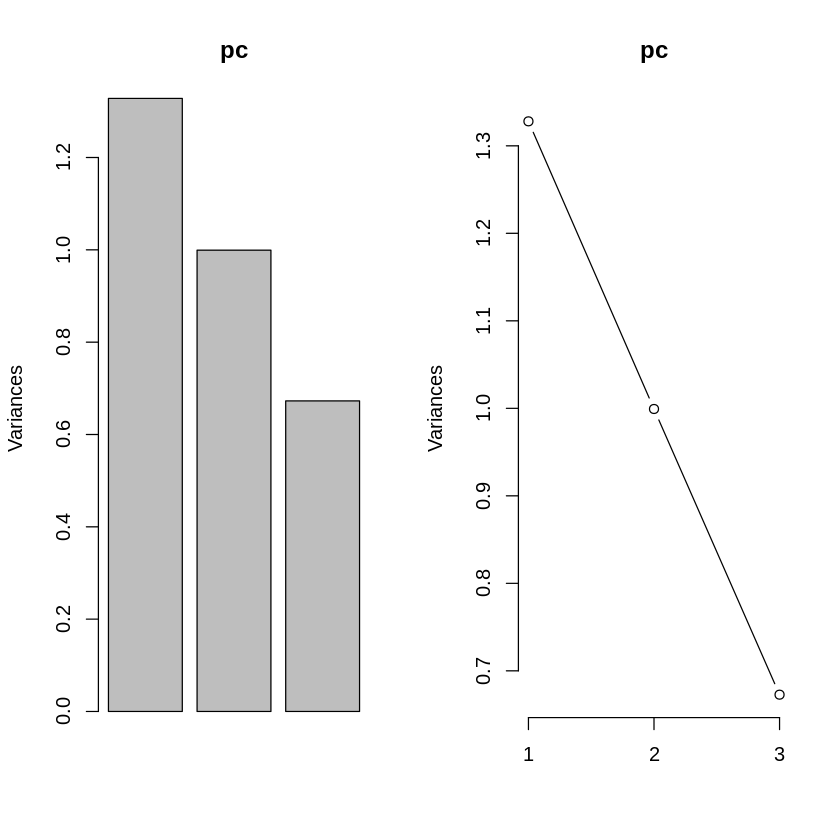

In [94]:
# A scree plot helps to assess how many principal components to keep.
layout(matrix(1:2, ncol=2))
screeplot(pc)
screeplot(pc, type="lines")

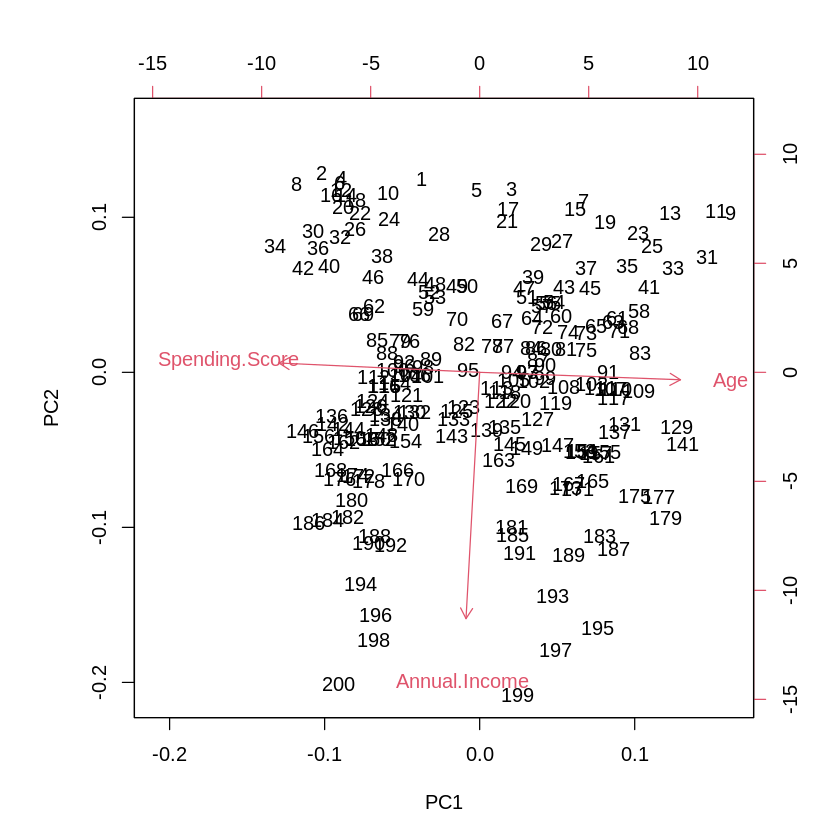

In [97]:
biplot(pc)

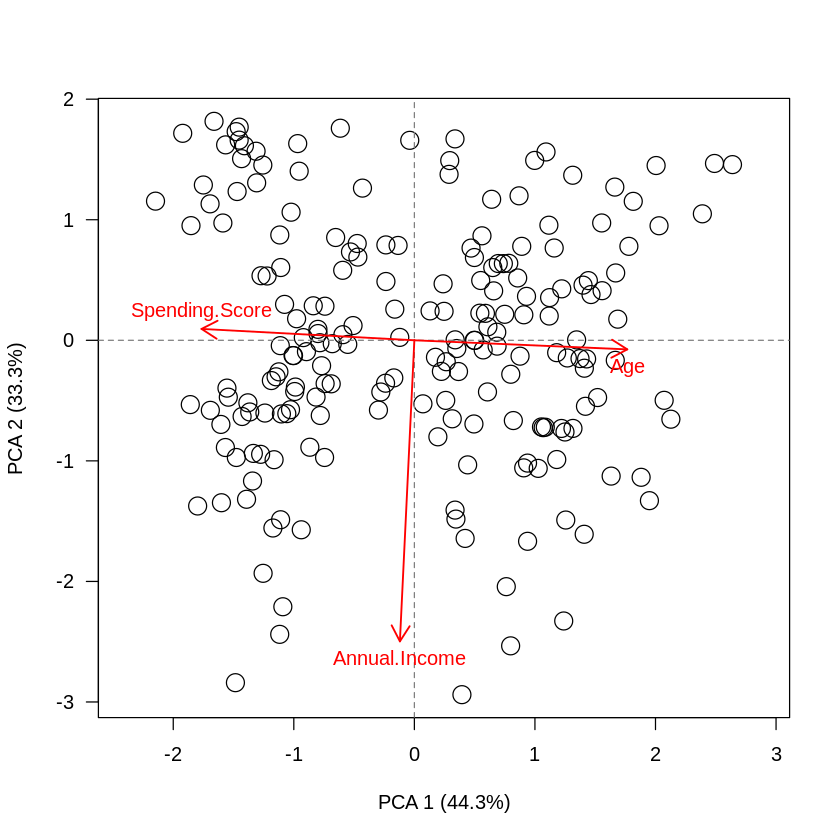

In [116]:
# Plot individuals
plot(pc$x[,1], pc$x[,2],
xlab=paste("PCA 1 (", round(s$importance[2]*100, 1), "%)", sep = ""),
ylab=paste("PCA 2 (", round(s$importance[5]*100, 1), "%)", sep = ""),
# pch=pch.group,
col="black",
# bg=col.group,
cex=2, las=1, asp=1)
# Add grid lines
abline(v=0, lty=2, col="grey50")
abline(h=0, lty=2, col="grey50")

# # Add labels
# text(pc$x[,1], pc$x[,2], labels=row.names(pc$x), pos=c(1,3,4,2), font=2)

# Get co-ordinates of variables (loadings), and multiply by 10
l.x <- pc$rotation[,1]*2.5
l.y <- pc$rotation[,2]*2.5

# Draw arrows
arrows(x0=0, x1=l.x, y0=0, y1=l.y, col="red", length=0.15, lwd=1.5)

# Label position
l.pos <- l.y # Create a vector of y axis coordinates
lo <- which(l.y < 0) # Get the variables on the bottom half of the plot
hi <- which(l.y > 0) # Get variables on the top half
# Replace values in the vector
l.pos <- replace(l.pos, lo, "1")
l.pos <- replace(l.pos, hi, "3")

# Variable labels
text(l.x, l.y, labels=row.names(pc$rotation), col="red", pos=l.pos)

# Add legend
# legend("topleft", legend=c("", "", ""), col="black", pt.bg=c("skyblue2", "gold", "green2"), pch=c(21, 22, 24), pt.cex=1.5)

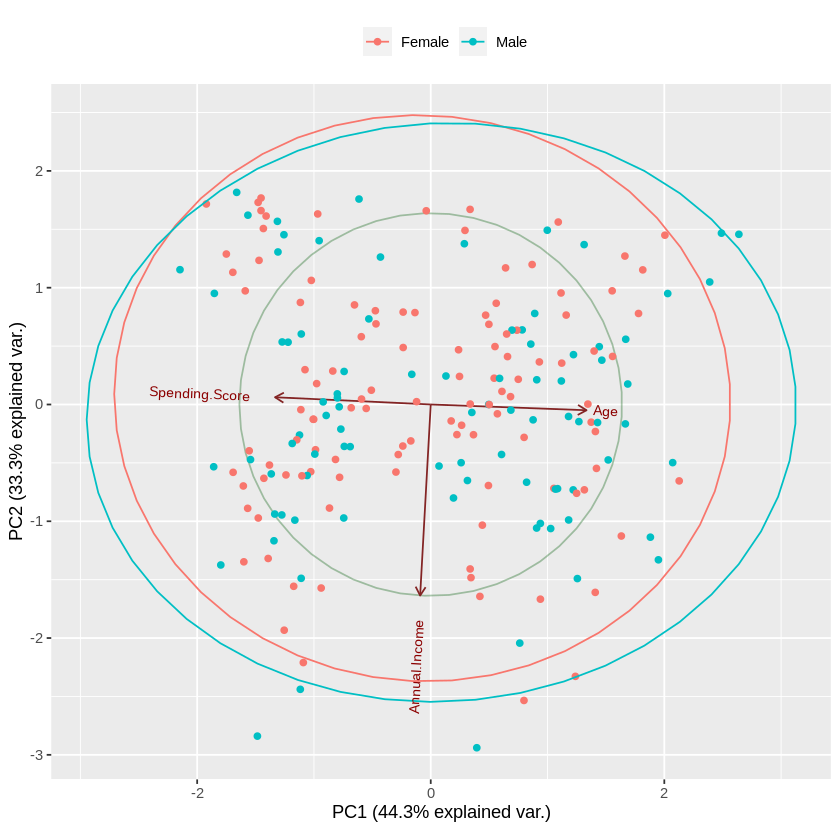

In [124]:
g <- ggbiplot(pc,
              obs.scale = 1,
              var.scale = 1,
              groups = tb$Genre,
              ellipse = TRUE,
              circle = TRUE,
              ellipse.prob = 0.95)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal',
               legend.position = 'top')
print(g)
# Added 95% confidence ellipses around groups of data in a pca plot (biplot)

PC1 explains about 44.3% and PC2 explained about 33.3% of variability.

Arrows that are closer to each other indicates the high correlation. The 03 variables are weakly correlated.

Another way interpreting the plot is PC1 is positively correlated with Age, and PC1 is negatively correlated with Spending_Score.

PC2 is highly negatively correlated with Annual Income.

Biplot is an important tool in PCA to understand what is going on in the dataset.

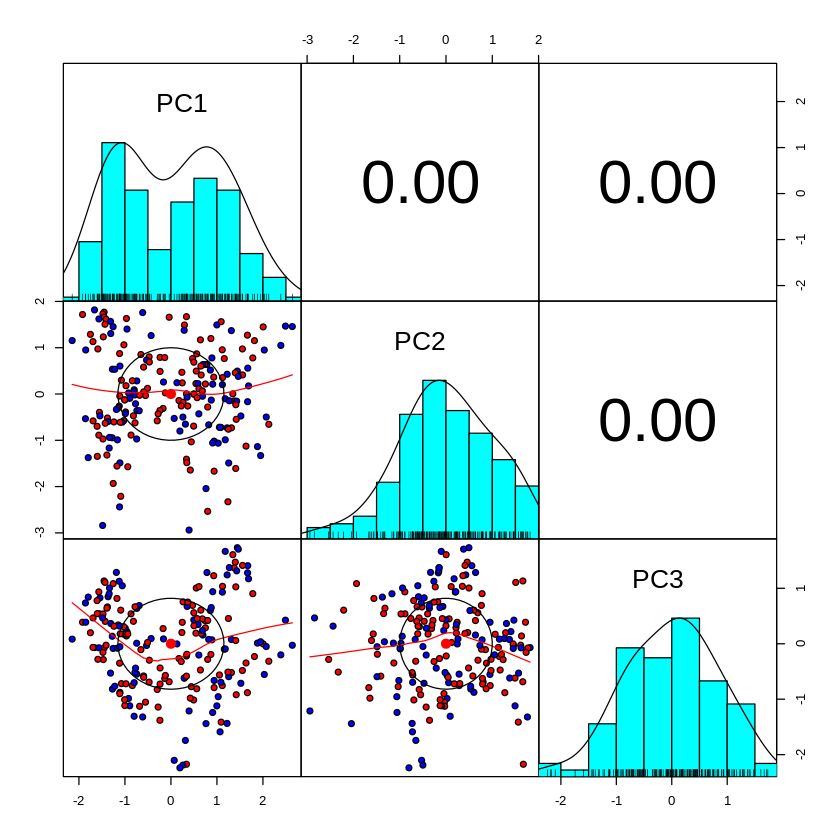

In [82]:
pairs.panels(pc$x,
             gap = 0,
             bg = c("red", "blue")[tb$Genre],
             pch=21)

Now the correlation coefficients are zero, so we can get rid of multicollinearity issues.

# Conclusion

- Spending Score of customers depends upon their genre, their age and their income:
  
  + Female customers spend more than their couterparts.
  + Younger customers tend to have higher Spending Score than the elders.
  + Customers with moderate income would spend wisely and mederately.
  + About half of low-income customers seems to spend more than moderate level, and the other half spends more economically. Similarly for the high-income customers.

- In order to build a good clustering model, we need to take all these 03 features into account. Next, we will group customers into clusters using Kmeans algorithm.